In [1]:
import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro

import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import pandas as pd

import covid
import covid.util as util
import covid.models.SEIRD_variable_detection
# import covid.models.SEIRD_bridge
import covid.models.SEIRD_incident

# Run Inference

In [16]:
#data = util.load_state_data()
data = util.load_data()

start = '2020-03-04'
end = '2020-08-02'
model_type = covid.models.SEIRD_incident.SEIRD


places = ['NY']

for place in places:
    util.run_place(data,
                   place,
                   start=start,
                   end=end,
                   model_type=model_type,
                   rw_scale=1e-1,
#                    resample_high=80,
#                    resample_low=0,
                   num_warmup=0,
                   num_samples=1000)

Running NY (start=2020-03-04, end=2020-08-02)
 * running MCMC


/Users/mysterefrank/miniconda3/envs/py3/lib/python3.8/site-packages/numpyro/handlers.py:382: FutureWarning: 'mask_array' argument is renamed to 'mask'. We will remove 'mask_array' in a future release.
  warnings.warn("'mask_array' argument is renamed to 'mask'. We will remove"
/Users/mysterefrank/miniconda3/envs/py3/lib/python3.8/site-packages/jax/numpy/lax_numpy.py:1601: FutureWarning: jax.numpy reductions won't accept lists and tuples in future versions, only scalars and ndarrays
  warnings.warn(msg, category=FutureWarning)
sample: 100%|██████████| 1000/1000 [00:21<00:00, 46.57it/s, 1 steps of size 1.00e+00. acc. prob=0.00] 



                            mean       std    median      5.0%     95.0%     n_eff     r_hat
                    D0  13880.16      0.00  13880.16  13880.16  13880.16       nan       nan
                    E0 177119.13      0.00 177119.13 177119.13 177119.13      0.50      1.00
                    H0   7466.36      0.00   7466.36   7466.36   7466.36      0.50      1.00
                    I0 257519.60      0.00 257519.60 257519.60 257519.60      0.50      1.00
                 beta0      6.38      0.00      6.38      6.38      6.38      0.50      1.00
  confirmed_dispersion      0.81      0.00      0.81      0.81      0.81      0.50      1.00
      death_dispersion      1.18      0.00      1.18      1.18      1.18      0.50      1.00
            death_prob      0.42      0.00      0.42      0.42      0.42      0.50      1.00
            death_rate      0.26      0.00      0.26      0.26      0.26       nan       nan
           det_prob[0]      0.87      0.00      0.87      0.87      0

 * collecting forecast samples


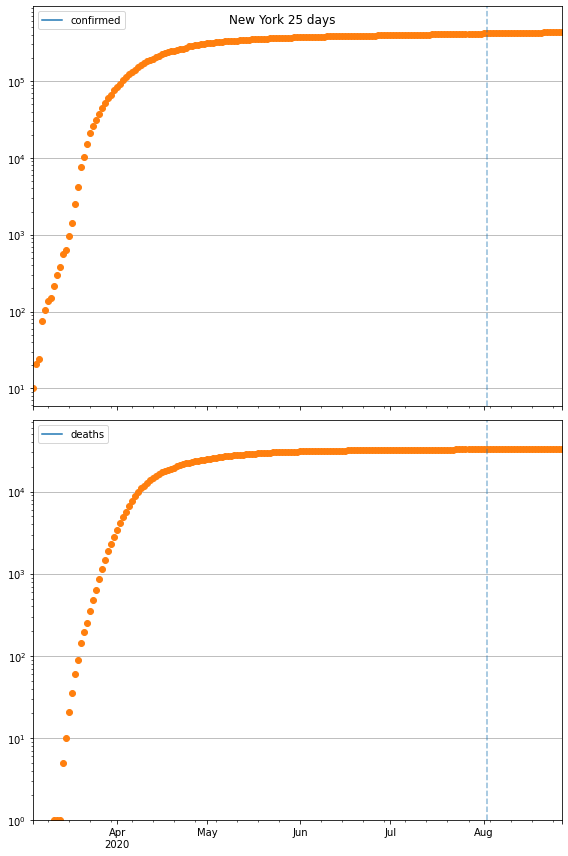

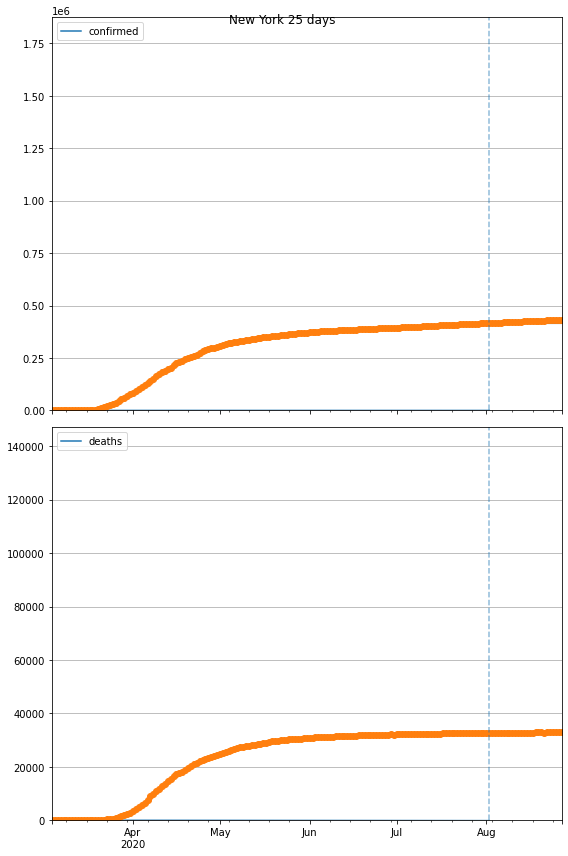

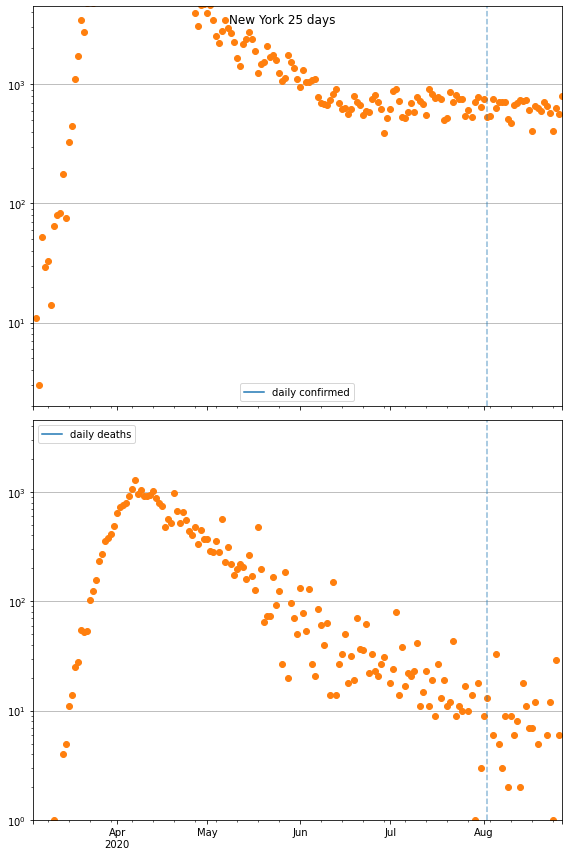

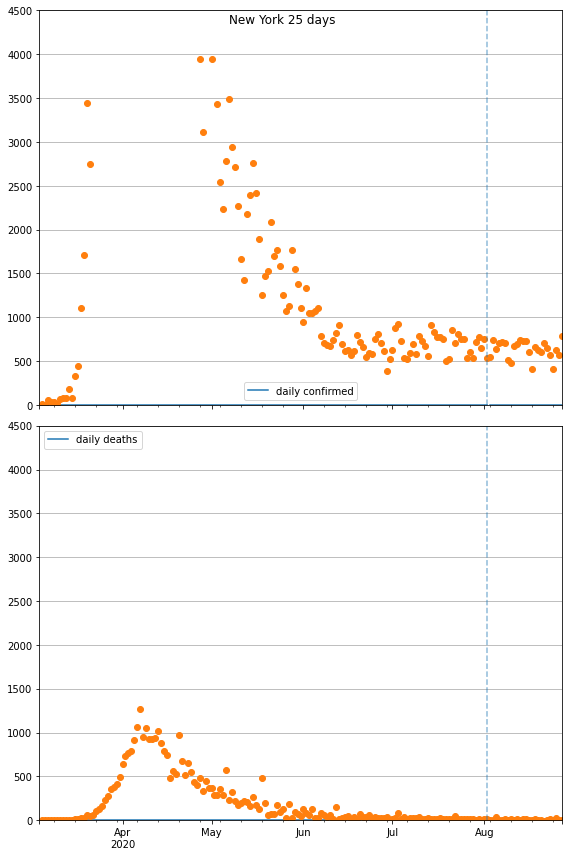

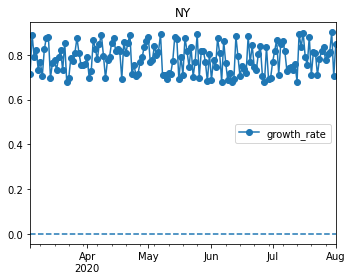

In [17]:
#data = util.load_state_data()
# data = util.load_county_data()
data = util.load_data()

start = '2020-03-04'
end=None
#places = ['PR']
places = ['NY']

save = True

# Inspect and Save Results 
for place in places:
    util.gen_forecasts(data,
                       place,
                       model_type=model_type,
                       start=start,
                       end=end,
                       save=save,
                       forecast_horizon=25)

In [18]:
zz = util.get_R_final(data,
                   place,
                   model_type=model_type,
                   start=start,
                   end=end,
                   save=save,
                   forecast_horizon=25)

In [30]:
zz[0][-1,-1]

DeviceArray(0.84868661, dtype=float64)